In [1]:
import cv2
from IPython.display import display, Image
import numpy as np
import matplotlib.pyplot as plt

In [5]:
file_names = [
    "img/26_知覚データを取得する2.jpg",
    "img/27_知覚データを取得する2.jpg"
]

In [ ]:
row = 2
col = 2

def analysis(img_name):
    fix, ax = plt.subplots(row, col, figsize=(10, 7))

    img = cv2.imread(img_name)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    ax[0, 0].imshow(img)

    img2 = cv2.GaussianBlur(img, (5, 5), 0)
    ax[0, 1].imshow(img2)

    img3 = cv2.cvtColor(img2, cv2.COLOR_RGB2HSV)
    img3 = cv2.inRange(img3, (95, 50, 50), (125, 255, 255))
    ax[1, 0].imshow(img3)

    contours, hierarchy = cv2.findContours(img3, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    img4 = img.copy()

    bottle_index = 0
    bottle_area = 0
    for i, contour in enumerate(contours):
        area = cv2.contourArea(contour)
        if bottle_area < area:
            bottle_index = i
            bottle_area = area
            # 最も大きいものをペットボトルとする
            ## 本当は良くなくて
            ## ペットボトルには青いラベルがついているだけでなく
            ## ラベルは正面から見れば四角形に見えるし
            ## ペットボトル特有の形状があるし
            ## 白いキャップも付いている
            ## いろんな分析を統合して、ペットボトルの偽陽性を減らしたい

    m = cv2.moments(contours[bottle_index])
    # モーメントが0の場合、ペットボトルではないと判断する
    # モーメントが0でない場合、ペットボトルと判断し、重心を計算する
    if bottle_area > 0 and m['m00'] != 0:
        x = round(m['m10'] / m['m00'])
        y = round(m['m01'] / m['m00'])
        print(f"重心位置: ({x}, {y})")

        # 重心位置に x印を書く
        cv2.line(img4, (x-5,y-5), (x+5,y+5), (255, 255, 127), 2)
        cv2.line(img4, (x+5,y-5), (x-5,y+5), (255, 255, 127), 2)

    ax[1, 1].imshow(img4)




重心位置: (306, 35)
重心位置: (156, 35)


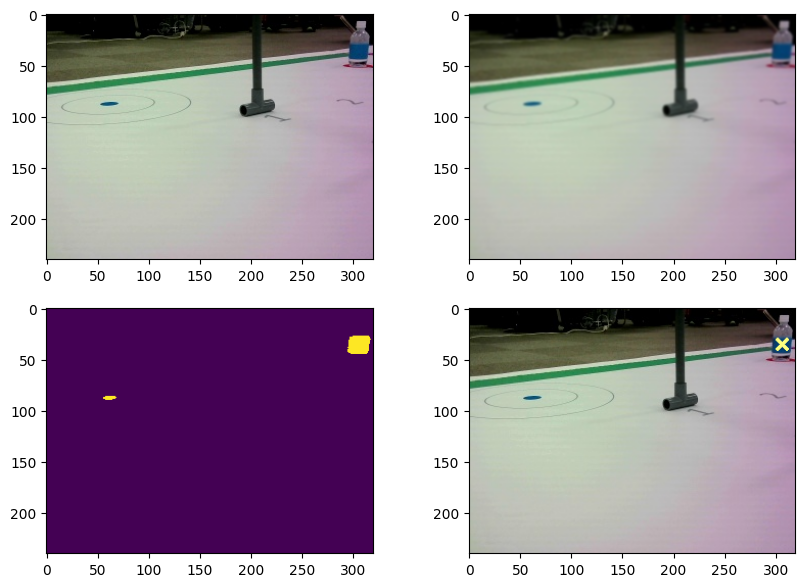

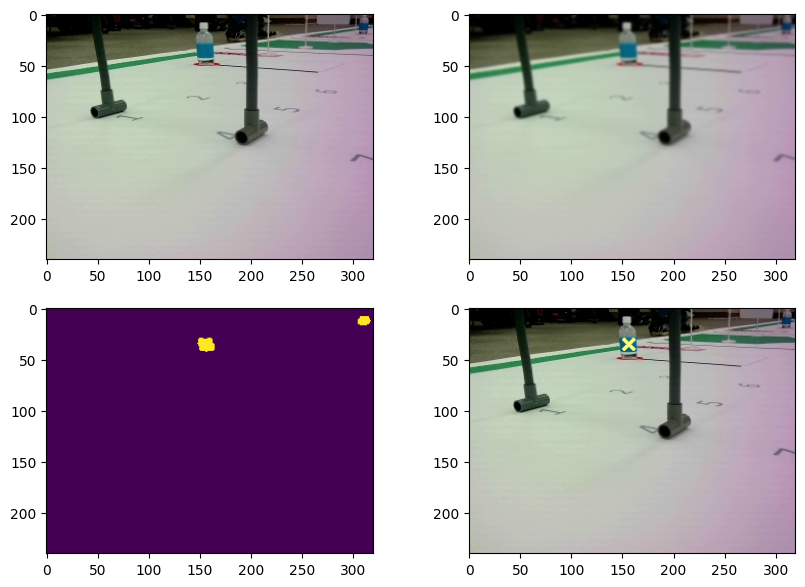

In [9]:
for img_name in file_names:
    analysis(img_name)